# 时间序列

pandas的一个特色就是时间序列操作.所谓时间序列可以理解为index为时间信息的序列对象(有时是数据框).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 生成时间序列

pandas提供了时间序列的生成函数`pd.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)[source])`可以像python使用range生成整数序列一样生成时间序列(DatetimeIndex类型),

其中

+ `end`/`start`和`periods`不共存,`start`,`end`标明起止日期,`periods`标明延续时常.用`periods`的话`end`/`start`必须只存在一个
+ `freq`定义间隔,参数为字符串形式,可以指定单位,比如`5H`,`3D`,具体由哪些单位可以看[这里](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

In [5]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [6]:
pd.date_range(start='1/1/2018', periods=5, freq='3M')

DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31',
               '2019-01-31'],
              dtype='datetime64[ns]', freq='3M')

通常生成的时间序列都是给Series或者Dataframe做index的,

In [8]:
index = pd.date_range(start='1/1/2018', end='1/08/2018')

In [9]:
pd.Series(5,index=index)

2018-01-01    5
2018-01-02    5
2018-01-03    5
2018-01-04    5
2018-01-05    5
2018-01-06    5
2018-01-07    5
2018-01-08    5
Freq: D, dtype: int64

## 转化时间序列

pandas提供了函数`.to_datetime()`可以将由各种时间信息组成的序列转化成时间序列

In [10]:
import datetime
import time

In [19]:
pd.to_datetime([np.datetime64('2018-01-01'),datetime.datetime(2018, 1, 1)]) # 处理datetime类型

DatetimeIndex(['2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [20]:
pd.to_datetime(['1/1/2018','1/2/2018','1/3/2018'],format='%m/%d/%Y') # 处理字符串

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime([1349720105, 1349806505, 1349892905,1349979305, 1350065705], unit='s') # 处理时间戳

DatetimeIndex(['2012-10-08 18:15:05', '2012-10-09 18:15:05',
               '2012-10-10 18:15:05', '2012-10-11 18:15:05',
               '2012-10-12 18:15:05'],
              dtype='datetime64[ns]', freq=None)

## 提取指定时间段内的数据

In [21]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s[:10]

2000-01-01   -0.995419
2000-01-02    0.299803
2000-01-03   -0.688532
2000-01-04    1.019509
2000-01-05    1.080041
2000-01-06    0.949750
2000-01-07   -0.049066
2000-01-08   -0.704941
2000-01-09    1.324811
2000-01-10    0.036751
Freq: D, dtype: float64

In [24]:
s["2000"][:10] #取同一年

2000-01-01   -0.995419
2000-01-02    0.299803
2000-01-03   -0.688532
2000-01-04    1.019509
2000-01-05    1.080041
2000-01-06    0.949750
2000-01-07   -0.049066
2000-01-08   -0.704941
2000-01-09    1.324811
2000-01-10    0.036751
Freq: D, dtype: float64

In [26]:
s["2000-01"][:40] # 取某年某月

2000-01-01   -0.995419
2000-01-02    0.299803
2000-01-03   -0.688532
2000-01-04    1.019509
2000-01-05    1.080041
2000-01-06    0.949750
2000-01-07   -0.049066
2000-01-08   -0.704941
2000-01-09    1.324811
2000-01-10    0.036751
2000-01-11   -1.154498
2000-01-12   -0.079264
2000-01-13    0.160674
2000-01-14    0.049950
2000-01-15   -0.901635
2000-01-16    1.255930
2000-01-17   -0.608129
2000-01-18    0.208124
2000-01-19    0.585852
2000-01-20   -0.304601
2000-01-21   -0.376128
2000-01-22    0.564078
2000-01-23   -0.703543
2000-01-24    1.595288
2000-01-25   -0.360244
2000-01-26    0.442470
2000-01-27    0.532481
2000-01-28    0.319283
2000-01-29   -1.402987
2000-01-30    0.716361
2000-01-31   -1.190318
Freq: D, dtype: float64

In [29]:
s['2000-1-28':'2000-2-3'] #一段日期

2000-01-28    0.319283
2000-01-29   -1.402987
2000-01-30    0.716361
2000-01-31   -1.190318
2000-02-01   -1.807341
2000-02-02   -0.954533
2000-02-03   -0.188877
Freq: D, dtype: float64

In [30]:
s['2000-1-28'] # 某一天

0.31928275714561777

## 窗口函数

对于处理时间序列数据,pandas提供了许多窗口函数用于计算公共窗口或滚动统计.其中包括计数,总和,平均值,中值,相关性,方差,协方差,标准偏差,偏度和峰度.

我们使用`rolling`,`.expanding `,`ewm` 对数据进行相应的处理

这三个函数的用法和groupby很像,他们的构造函数通常这些方法都有相同的接口.
他们都接受以下参数:

+ window:移动窗口的大小
+ min_periods:要求非空数据点的阈值（否则结果为NA）
+ center:boolean，是否在中间设置标签（默认为False）
+ axis

### rolling函数

`rolling(window,min_periods,center,axis)`

In [2]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()
s[:5]

2000-01-01    1.061108
2000-01-02    1.143829
2000-01-03    0.042465
2000-01-04   -1.061528
2000-01-05   -1.251423
Freq: D, dtype: float64

In [3]:
r = s.rolling(window=10)
r

Rolling [window=10,center=False,axis=0]

In [4]:
r.mean()[:20]

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08         NaN
2000-01-09         NaN
2000-01-10    0.012929
2000-01-11    0.016536
2000-01-12    0.089529
2000-01-13    0.187641
2000-01-14    0.418945
2000-01-15    0.637028
2000-01-16    0.568675
2000-01-17    0.767808
2000-01-18    0.934924
2000-01-19    1.320222
2000-01-20    1.503517
Freq: D, dtype: float64

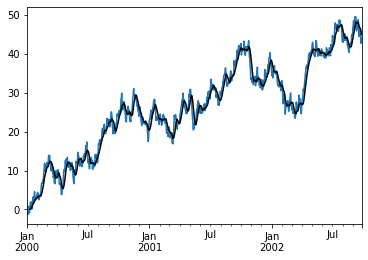

In [5]:
s.plot()
r.mean().plot(style='k')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1156770f0>,
      dtype=object)

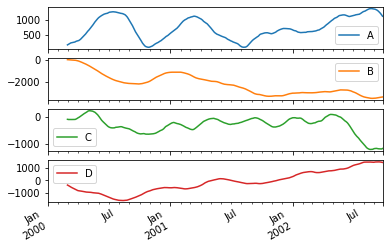

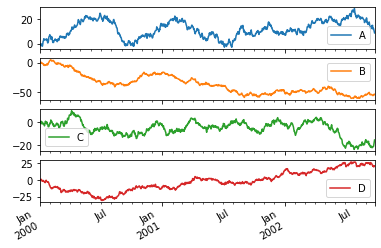

In [6]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
df.rolling(window=60).sum().plot(subplots=True)
df.plot(subplots=True)

### 使用自定义的方法 

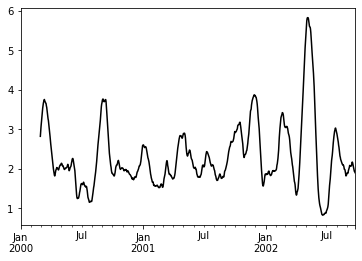

In [7]:
s.rolling(window=60).apply(lambda x: np.fabs(x - x.mean()).mean(),raw=True).plot(style='k')

rolling有一个特有关键字win_type,它表示窗口的类型,公认类型有:
+ boxcar
+ triang
+ blackman
+ hamming
+ bartlett
+ parzen
+ bohman
+ blackmanharris
+ nuttall
+ barthann
+ kaiser (需要beta参数)
+ gaussian (需要std参数)
+ general_gaussian (需要 power, width参数)
+ slepian (需要width参数).

In [8]:
ser = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))
ser.rolling(window=5, win_type='triang').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -1.049692
2000-01-06   -1.115787
2000-01-07   -0.666003
2000-01-08   -0.149324
2000-01-09   -0.064220
2000-01-10   -0.378598
Freq: D, dtype: float64

In [9]:
ser.rolling(window=5, win_type='boxcar').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.898436
2000-01-06   -0.869136
2000-01-07   -0.524903
2000-01-08   -0.427698
2000-01-09   -0.414232
2000-01-10   -0.242575
Freq: D, dtype: float64

In [10]:
ser.rolling(window=5, win_type='gaussian').mean(std=0.1)

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -1.169154
2000-01-06   -1.717525
2000-01-07   -1.092201
2000-01-08    0.532417
2000-01-09    0.821946
2000-01-10   -0.683129
Freq: D, dtype: float64

#### 时间感知滚动

这对于非规则的时间频率指数特别有用。第一个参数使用字符串表示时间间隔即可

In [11]:
dft = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                   index=pd.date_range('20130101 09:00:00', periods=5, freq='s'))
dft

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,2.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,4.0


In [12]:
dft.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


#### 计算窗口的cov() 和 corr() 

在金融数据分析和其他领域中,通常对于时间序列的集合计算协方差和相关矩阵.通常人们也对移动窗协方差和相关矩阵感兴趣.这可以通过传递`pairwise`关键字参数来实现,在DataFrame输入的情况下,将产生一个Panel,其中的items是有问题的日期.在单个DataFrame参数的情况下,成对参数甚至可以省略


In [13]:
df2 = df[:20]
df2.rolling(window=5).corr(df2['B'])

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,-0.013771,1.0,0.051814,0.294500
2000-01-06,-0.153475,1.0,0.209701,0.729156
2000-01-07,-0.378544,1.0,0.497041,0.714231
2000-01-08,-0.226850,1.0,0.581944,0.435943
2000-01-09,-0.068159,1.0,0.529225,0.394325
2000-01-10,-0.547704,1.0,-0.079096,-0.071999


In [14]:
covs = df[['B','C','D']].rolling(window=50).cov(df[['A','B','C']], pairwise=True)

In [15]:
covs.loc[df.index[-50]]

,B,C,D
A,-3.366503,-1.697049,2.308745
B,4.988816,2.207432,-0.370125
C,2.207432,3.962947,-0.601842


In [16]:
correls = df.rolling(window=50).corr()
correls.loc[df.index[-50]]

,A,B,C,D
A,1.000000,-0.604904,-0.342130,0.421968
B,-0.604904,1.000000,0.496454,-0.075465
C,-0.342130,0.496454,1.000000,-0.137680
D,0.421968,-0.075465,-0.137680,1.000000


In [17]:
correls.reorder_levels([1,0], axis=0).loc["A",:]["C"]

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08         NaN
2000-01-09         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-15         NaN
2000-01-16         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-22         NaN
2000-01-23         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-26         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-29         NaN
2000-01-30         NaN
                ...   
2002-08-28   -0.429215
2002-08-29   -0.463922
2002-08-30   -0.521507
2002-08-31   -0.557186
2002-09-01   -0.596870
2002-09-02   -0.630756
2002-09-03   -0.654455
2002-09-04   -0.695831
2002-09-05   -0.702939
2002-09-06   -0.716429
2002-09-07   -0.724767
2002-09-08   -0.742225
2002-09-09 

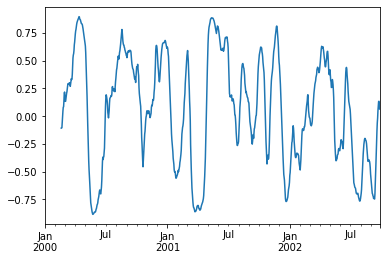

In [18]:
correls.reorder_levels([1,0], axis=0).loc["A",:]["C"].plot()

### 使用`aggregate`聚合

这个操作和groupby那个聚合非常类似,构建窗口后通过一系列算法获得了各窗口的值,我们可以通过传递一个函数到整个DataFrame

也可以用`agg()`一次应用多个function

In [19]:
dfa = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('1/1/2000', periods=1000),
                    columns=['A', 'B', 'C'])

In [20]:
r = dfa.rolling(window=60,min_periods=1)
r.aggregate(np.sum)[:10]

,A,B,C
2000-01-01,0.069055,-0.431206,-0.250284
2000-01-02,1.541963,-0.869075,-0.478704
2000-01-03,4.381829,-2.640809,0.837516
2000-01-04,4.824145,-2.998398,0.660984
2000-01-05,5.388716,-3.750861,1.237194
2000-01-06,4.671739,-2.204327,0.628633
2000-01-07,5.248314,-2.217534,1.141510
2000-01-08,5.711637,-2.554723,0.104990
2000-01-09,6.032947,-2.689234,-1.642611
2000-01-10,5.765271,-2.938515,-2.359754


In [21]:
r['A'].agg([np.sum, np.mean, np.std])[:10]

,sum,mean,std
2000-01-01,0.069055,0.069055,NaN
2000-01-02,1.541963,0.770981,0.992674
2000-01-03,4.381829,1.460610,1.385446
2000-01-04,4.824145,1.206036,1.240513
2000-01-05,5.388716,1.077743,1.111957
2000-01-06,4.671739,0.778623,1.235312
2000-01-07,5.248314,0.749759,1.130263
2000-01-08,5.711637,0.713955,1.051310
2000-01-09,6.032947,0.670327,0.992081
2000-01-10,5.765271,0.576527,0.981250


In [22]:
r['A'].agg({'result1' : np.sum,'result2' : np.mean})[:10]

,result1,result2
2000-01-01,0.069055,0.069055
2000-01-02,1.541963,0.770981
2000-01-03,4.381829,1.460610
2000-01-04,4.824145,1.206036
2000-01-05,5.388716,1.077743
2000-01-06,4.671739,0.778623
2000-01-07,5.248314,0.749759
2000-01-08,5.711637,0.713955
2000-01-09,6.032947,0.670327
2000-01-10,5.765271,0.576527


In [23]:
r.agg([np.sum, np.mean])[:10]

A                   B                   C          
                 sum      mean       sum      mean       sum      mean
2000-01-01  0.069055  0.069055 -0.431206 -0.431206 -0.250284 -0.250284
2000-01-02  1.541963  0.770981 -0.869075 -0.434537 -0.478704 -0.239352
2000-01-03  4.381829  1.460610 -2.640809 -0.880270  0.837516  0.279172
2000-01-04  4.824145  1.206036 -2.998398 -0.749599  0.660984  0.165246
2000-01-05  5.388716  1.077743 -3.750861 -0.750172  1.237194  0.247439
2000-01-06  4.671739  0.778623 -2.204327 -0.367388  0.628633  0.104772
2000-01-07  5.248314  0.749759 -2.217534 -0.316791  1.141510  0.163073
2000-01-08  5.711637  0.713955 -2.554723 -0.319340  0.104990  0.013124
2000-01-09  6.032947  0.670327 -2.689234 -0.298804 -1.642611 -0.182512
2000-01-10  5.765271  0.576527 -2.938515 -0.293852 -2.359754 -0.235975

### expanding函数

`expanding(window,min_periods,center,axis)`

滚动统计的一个常见替代方法是使用扩展窗口,该窗口产生具有到达该时间点之前可用的所有数据的统计的值.

他的接口接近`.rolling`的接口`.expanding`方法返回一个`Expanding`对象.我们可以对比下一下两个函数,他们是等效的

In [24]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,-1.037228,0.559174,-1.177712,0.076422
2000-01-02,-0.571626,0.326794,-1.091479,0.327348
2000-01-03,-0.862770,0.214503,-0.535658,0.471560
2000-01-04,-0.855107,0.560978,-0.370145,0.613405
2000-01-05,-0.806280,0.531091,-0.118997,0.714881


In [25]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,-1.037228,0.559174,-1.177712,0.076422
2000-01-02,-0.571626,0.326794,-1.091479,0.327348
2000-01-03,-0.862770,0.214503,-0.535658,0.471560
2000-01-04,-0.855107,0.560978,-0.370145,0.613405
2000-01-05,-0.806280,0.531091,-0.118997,0.714881


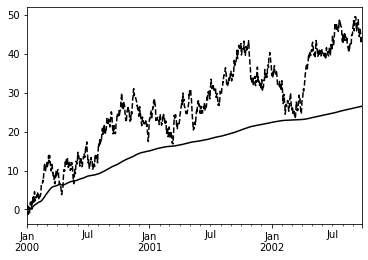

In [26]:
s.plot(style='k--')
s.expanding().mean().plot(style='k')

### 指数加权窗口ewm

ewm是几个上述统计量的指数加权版本。
他支持的默认方法比较少

Function|Description
---|---
mean()|EW moving average
var()|EW moving variance
std()|EW moving standard deviation
corr()|EW moving correlation
cov()|EW moving covariance

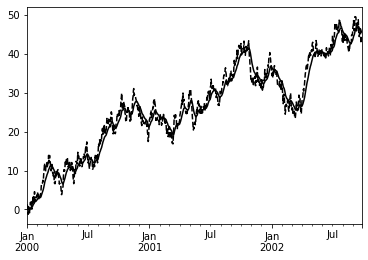

In [27]:
s.plot(style='k--')
s.ewm(span=20).mean().plot(style='k')